# Feature Engineering and Feature Selection Exercises
This notebook contains hands-on exercises for feature engineering and feature selection using Python.
Datasets used:
- Titanic (from seaborn)
- Iris (from sklearn)
- Breast Cancer (from sklearn)


## Part 1 – Feature Engineering
### Exercise 1: Create new features from existing ones
**Dataset:** Titanic dataset (`seaborn.load_dataset('titanic')`)
 

In [111]:
import seaborn as sns
import pandas as pd
pd.options.mode.copy_on_write = True

titanic = sns.load_dataset('titanic')

###  1.1 The Titanic dataset

A list of all passengers on the last Titanic voyage.

**Features:**
   * survived - (0 = no, 1 = yes)
   * pclass - (1 = First class, 2 = Second class, 3 = Third class)
   * sex - ("male", "female")
   * age - Age in years
   * sibsp - Number of siblings/parents on board.
   * parch - Number of parents/kids on board.
   * fare - Ticket price

Source: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data


In [112]:
# 0. print the first few rows of the dataset 
print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [113]:
# 1. Create FamilySize = sibsp + parch + 1
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# 2. Create IsAlone = 1 if FamilySize == 1 else 0
titanic["is_alone"] = (titanic["family_size"] == 1).astype(int)

# 3. Convert 'sex' column into numerical format (0=female, 1=male) (Hint: use map. for example: df['col'] = df['col'].map({'a': 1, 'b': 2}))
titanic['sex_numerical'] = titanic["sex"].map({"female": 0, "male": 1})


print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  family_size  is_alone  \
0    man        True  NaN  Southampton    no  False            2         0   
1  woman       False    C    Cherbourg   yes  False            2         0   
2  woman       False  NaN  Southampton   yes   True            1         1   
3  woman       False    C  Southampton   yes  False            2         0   
4    man        True  NaN  Southampton    no   True            1         1   

   sex_numerical  
0              1  
1              0  
2              0 

### Exercise 2: Handling missing values


#### 2.1. Identify columns with missing values


In [114]:
with_missing = titanic[titanic.columns[titanic.isna().any()]]

with_missing

,age,embarked,deck,embark_town
0,22.0,S,NaN,Southampton
1,38.0,C,C,Cherbourg
2,26.0,S,NaN,Southampton
3,35.0,S,C,Southampton
4,35.0,S,NaN,Southampton
...,...,...,...,...
886,27.0,S,NaN,Southampton
887,19.0,S,B,Southampton
888,NaN,S,NaN,Southampton
889,26.0,C,C,Cherbourg



#### 2.2. Impute missing numerical values with the median

In [115]:
# Impute missing values:
#   1. missing numerical <- median: (hint: use select_dtypes(include=['number']).columns to select numerical columns. and then use fillna)

numbers_with_missing = with_missing.select_dtypes(include="number")
numbers_filled = numbers_with_missing.fillna(numbers_with_missing.median())

titanic[numbers_filled.columns] = numbers_filled

display(numbers_with_missing.median())
numbers_filled

age    28.0
dtype: float64

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0



#### 2.3. Impute missing categorical values with the mode

In [116]:

#   2.3.1 missing categorical <- mode: (hint: user select_dtypes(include=['object', 'category']).columns to select categorical columns. and then use fillna)
categorical_with_missing = with_missing.select_dtypes(include=['object', 'category'])
{
    col: categorical_with_missing[col].unique() for col in categorical_with_missing.columns
}

{'embarked': array(['S', 'C', 'Q', nan], dtype=object),
 'deck': [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
 Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
 'embark_town': array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)}

In [117]:
# 2.3.2 Add the category "MISSING" to all category columns
for column in categorical_with_missing.select_dtypes(include="category"):
    try:
        categorical_with_missing[column] = categorical_with_missing[column].cat.add_categories("MISSING")
    except ValueError:
        continue

categorical_filled = categorical_with_missing.fillna("MISSING")

titanic[categorical_with_missing.columns] = categorical_filled

categorical_filled


,embarked,deck,embark_town
0,S,MISSING,Southampton
1,C,C,Cherbourg
2,S,MISSING,Southampton
3,S,C,Southampton
4,S,MISSING,Southampton
...,...,...,...
886,S,MISSING,Southampton
887,S,B,Southampton
888,S,MISSING,Southampton
889,C,C,Cherbourg


In [118]:
#   2.3.3 Verify if there are no missing values, by checking the unique values of each column, looking for NaN values.
{
    col: titanic[col].unique() for col in list(categorical_with_missing.columns) + list(numbers_with_missing.columns)
}


{'embarked': array(['S', 'C', 'Q', 'MISSING'], dtype=object),
 'deck': ['MISSING', 'C', 'E', 'G', 'D', 'A', 'B', 'F']
 Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'MISSING'],
 'embark_town': array(['Southampton', 'Cherbourg', 'Queenstown', 'MISSING'], dtype=object),
 'age': array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
        19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
        29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
        25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
        37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
        55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
        20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
        10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
        24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])}

### Exercise 3: Encoding categorical variables
**Dataset:** Iris dataset (`sklearn.datasets.load_iris`)

In [119]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True) # Load data as a DataFrame, where (data, target) will be pandas DataFrames or Series
iris_df = iris.data.copy()      # Features only, without inbuilt 'target' column.

iris_df['species'] = pd.Index(iris.target_names)[iris.target] # add 'species' column to iris_df using target names

display(iris_df.head())         # Display the first few rows of the iris dataset
display("Unique species names: ", iris_df['species'].unique())  # Display unique species names

# --- Encode species names using One-Hot Encoding and Label Encoding ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


'Unique species names: '

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 3.1. Label encoding (hint: use LabelEncoder, and fit_transform)

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

display("Before transform: ", iris_df['species'])
species_labels = le.fit_transform(iris_df['species'])
display("After transform: ", species_labels)


'Before transform: '

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

'After transform: '

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### 3.1.1 The mapping

In [121]:
id_to_name = list(enumerate(le.classes_))
display(id_to_name)

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

#### 3.2. Onehot encoding 
      

In [122]:
from sklearn.preprocessing import OneHotEncoder   

onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

species_onehot = onehot.fit_transform(iris_df[['species']], iris_df['species'])
        #  then fit_transform, 
        #  after that use et_feature_names_out(['species']).tolist() to get the one-hot encoded column names, 
        #  and then add the one-hot encoded columns to iris_df)

columns = list(map(lambda x: x[1], id_to_name))

from pandas import DataFrame
iris_df[columns] = DataFrame.from_records(species_onehot).astype(int)

iris_df[columns]

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## Part 2 – Feature Selection
### Exercise 4: Correlation-based selection
**Dataset:** Continuous with the processed Titanic dataset

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical variables

# 1. select numerical columns: (HINT you have done this before in part 1))
titanic.select_dtypes(include="number").head(5)

,survived,pclass,age,sibsp,parch,fare,family_size,is_alone,sex_numerical
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,2,0,0
2,1,3,26.0,0,0,7.9250,1,1,0
3,1,1,35.0,1,0,53.1000,2,0,0
4,0,3,35.0,0,0,8.0500,1,1,1


In [124]:

    # 2. compute correlation matrix (Hint: use corr(numeric_only=True) to compute correlation matrix for numerical variables

# drop the target, because we only want to look at the correlation between features.
titanic_features = titanic.drop(columns=["survived"]) 
corr = titanic_features.corr(numeric_only=True)

corr

,pclass,age,sibsp,parch,fare,adult_male,alone,family_size,is_alone,sex_numerical
pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207,0.065997,0.135207,0.131900
age,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647,-0.245619,0.171647,0.081163
sibsp,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471,0.890712,-0.584471,-0.114631
parch,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398,0.783111,-0.583398,-0.245489
fare,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.217138,-0.271832,-0.182333
adult_male,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744,-0.348143,0.404744,0.908578
alone,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000,-0.690922,1.000000,0.303646
family_size,0.065997,-0.245619,0.890712,0.783111,0.217138,-0.348143,-0.690922,1.000000,-0.690922,-0.200988
is_alone,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000,-0.690922,1.000000,0.303646
sex_numerical,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.908578,0.303646,-0.200988,0.303646,1.000000


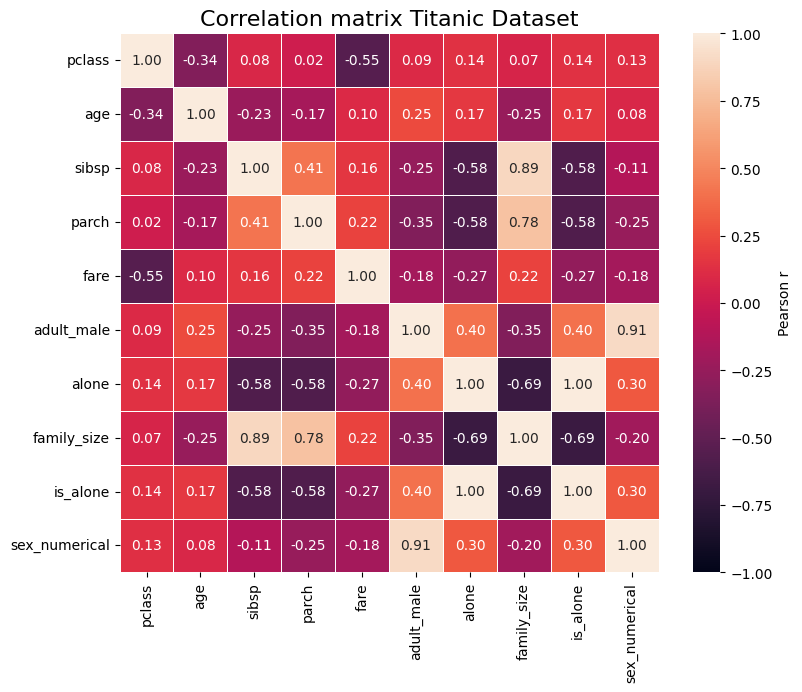

In [125]:

# 3. (optional) Plot matrix 
        # (HINT: uncomment the following lines to plot the correlation matrix.
        #  Remember to import seaborn and matplotlib.pyplot and replace 'corr' by your correlation matrix variable name)
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, square=True,
             linewidths=0.5, cbar_kws={"label": "Pearson r"})
plt.title("Correlation matrix Titanic Dataset", fontsize=16)
plt.show()

In [ ]:

    # 4. Drop variables with high correlation (>0.85)
threshhold = 0.85 
keep_fea = []   # features we keep
drop_fea = []   # features to drop

        # (HINT: use for loop to iterate over the columns of the correlation matrix, 
        #   for example: 
for col in corr.columns:

    any_correlation_above_treshhold = False
    for row in keep_fea:
        if corr.loc[col, row] > threshhold:
            drop_fea.append(col)
            any_correlation_above_treshhold = True
            break

    if not any_correlation_above_treshhold:
        keep_fea.append(col)

keep_fea, drop_fea

(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone'],
 ['family_size', 'is_alone', 'sex_numerical'])

In [127]:

#   5. (optional) if you want to create a reduced dataset with dropped features: (uncomment the following line)
before = len(titanic.columns)
titanic_reduced = titanic.drop(columns=drop_fea)
after = len(titanic_reduced.columns)

print(f"The number of columns dropped: {after-before}")

The number of columns dropped: -3


### Exercise 5: Univariate feature selection
**Dataset:** Breast Cancer dataset (`sklearn.datasets.load_breast_cancer`)

In [128]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target

    # 1. Train/test split (HINT: use train_test_split from sklearn.model_selection)
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("X_train:")
display(X_train)
print("X_test:")
X_test


X_train:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
286,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,...,13.24,27.29,92.20,546.1,0.1116,0.2813,0.2365,0.11550,0.2465,0.09981
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.14090
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
240,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.2123,0.09861,0.2289,0.08278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.20130,0.4432,0.10860
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
472,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.1065,0.2791,0.3151,0.11470,0.2688,0.08273
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.1338,0.2117,0.3446,0.14900,0.2341,0.07421


X_test:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,...,13.32,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.1506,0.17640,0.08235,0.3024,0.06949
249,11.520,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.18040,0.09608,0.2664,0.07809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.1143,0.3619,0.60300,0.14650,0.2597,0.12000
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.34860,0.09910,0.2614,0.11620
81,13.340,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.1536,0.4791,0.48580,0.17080,0.3527,0.10160
533,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,0.05419,...,23.23,27.15,152.00,1645.0,0.1097,0.2534,0.30920,0.16130,0.3220,0.06386


In [129]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression


    # 2. Select top 5 features 
        # (hint: using SelectKBest(score_func=f_classif, k=5) , and then fit it to the training data. 
        #  After that, use get_support() to get a boolean mask of selected features, and then use it to get the feature names from X.columns)
    
kbest = SelectKBest(score_func=f_classif, k=5)

fit = kbest.fit(X_train, y_train)
fit.get_feature_names_out()


array(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'], dtype=object)

In [130]:

# 3. make training dataset based on the selected features: 

fit_columns = X_train.columns[fit.get_support()]
X_train_kbest = X_train[fit_columns]
X_test_kbest = X_test[fit_columns]
X_train_kbest

,mean perimeter,mean concave points,worst radius,worst perimeter,worst concave points
286,77.87,0.03791,13.24,92.20,0.11550
562,103.40,0.09429,17.52,128.70,0.23560
269,69.50,0.02867,11.69,76.51,0.08600
240,87.38,0.03731,14.85,94.11,0.09222
534,70.79,0.02788,11.62,76.43,0.09861
...,...,...,...,...,...
203,91.56,0.09176,19.20,128.50,0.20130
558,96.39,0.03736,15.48,105.90,0.11050
472,96.45,0.03221,17.18,112.00,0.11470
27,122.10,0.07731,21.31,139.90,0.14900


In [131]:

# 4. (optional) Training a Logistic Regression model with selected features

        # HINT: Since we have not talked about the algorithms, it is possible for you to use the code provided below:
clf_5 = LogisticRegression(max_iter=100, # max_iter is increased to ensure convergence
                          solver="liblinear"  # use liblinear for small datasets
                        )
clf_5.fit(X_train_kbest, y_train)
y_pred = clf_5.predict(X_test_kbest)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9370629370629371


### Exercise 6: Recursive Feature Elimination (RFE)

In [132]:
from sklearn.feature_selection import RFE

# 1. Use RFE with logistic regression to select top 7 features 
        # (Hint: use RFE(estimator=clf_5, n_features_to_select=7, step=1), 
        # then fit it to the training data, 
        # and then use X.columns[rfe.support_].tolist() to get the selected features)
rfe = RFE(estimator=clf_5, n_features_to_select=7, step=1)

fit = rfe.fit(X_train, y_train)
fit.get_feature_names_out()

array(['mean radius', 'mean concavity', 'mean concave points',
       'perimeter error', 'worst radius', 'worst concavity',
       'worst concave points'], dtype=object)

In [133]:

    # 2. Make training dataset based on the selected 7 features
X_train_krfe = X_train[fit.get_feature_names_out()]
X_test_krfe = X_test[fit.get_feature_names_out()]
X_train_krfe


,mean radius,mean concavity,mean concave points,perimeter error,worst radius,worst concavity,worst concave points
286,11.94,0.06574,0.03791,3.198,13.24,0.2365,0.11550
562,15.22,0.25500,0.09429,2.362,17.52,1.1700,0.23560
269,10.71,0.08448,0.02867,2.230,11.69,0.2534,0.08600
240,13.64,0.04705,0.03731,1.996,14.85,0.1533,0.09222
534,10.96,0.05263,0.02788,1.165,11.62,0.2123,0.09861
...,...,...,...,...,...,...,...
203,13.81,0.15580,0.09176,3.909,19.20,0.4646,0.20130
558,14.59,0.10290,0.03736,2.224,15.48,0.3662,0.11050
472,14.92,0.05539,0.03221,1.826,17.18,0.3151,0.11470
27,18.61,0.14900,0.07731,5.632,21.31,0.3446,0.14900


In [134]:

    # 3. Train new model on selected features and Compare accuracy with and without RFE. What the accuracy difference?
        # (HINT, uncomment the following lines to train a new model and compare accuracy with the previous model)---
clf_7 = LogisticRegression(max_iter=100,
                            solver="liblinear")
clf_7.fit(X_train_krfe, y_train)
y_pred_7 = clf_7.predict(X_test_krfe)
print("Accuracy:", accuracy_score(y_test, y_pred_7))


Accuracy: 0.9230769230769231
